<a href="https://colab.research.google.com/github/Imran012x/Hilsha_CoLab/blob/main/1_CNN%2Btransfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")


#Data Preprocessing

In [2]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_fish_224_12k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
ilish_pic= os.listdir('/content/ilish/')
print(ilish_pic[0:5])
print(ilish_pic[-5:])
chandana_pic= os.listdir('/content/chandana/')
sardin_pic= os.listdir('/content/sardin/')
sardinella_pic= os.listdir('/content/sardinella/')
punctatus_pic= os.listdir('/content/punctatus/')

['977.webp', '327.webp', '1246.webp', '2809.webp', '2231.webp']
['1294.webp', '875.webp', '2973.webp', '1250.webp', '487.webp']


In [5]:
print('ilish   images:', len(ilish_pic))
print('chandana  images:', len(chandana_pic))
print('sardin   images:', len(sardin_pic))
print('sardinella  images:', len(sardinella_pic))
print('punctatus images:', len(sardinella_pic))

ilish   images: 3000
chandana  images: 2000
sardin   images: 3000
sardinella  images: 2000
punctatus images: 2000


In [6]:
ilish_pic_labels = [0]*len(ilish_pic)
chandana_pic_labels = [1]*len(chandana_pic)
sardin_pic_labels = [2]*len(sardin_pic)
sardinella_pic_labels = [3]*len(sardinella_pic)
punctatus_pic_labels = [4]*len(punctatus_pic)


print(ilish_pic_labels[0:5])

print(chandana_pic_labels[0:5])

print(sardin_pic_labels[0:5])

print(sardinella_pic_labels[0:5])

print(punctatus_pic_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4, 4]


In [7]:
labels = ilish_pic_labels + chandana_pic_labels + sardin_pic_labels + sardinella_pic_labels + punctatus_pic_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

12000
[0, 0, 0, 0, 0]
[4, 4, 4, 4, 4]


In [8]:
import random
import os
from PIL import Image
import numpy as np

# Parameters (set different numbers for each class)
ilish_image_number = len(ilish_pic)
chandana_image_number = len(chandana_pic)
sardin_image_number = len(sardin_pic)
sardinella_image_number = len(sardinella_pic)
punctatus_image_number = len(punctatus_pic)


# Initialize the list to store the images
data = []

def process_images(image_path, image_number):
    image_labels = sorted(os.listdir(image_path))  # Ensure images are in order
    random.shuffle(image_labels)  # Shuffle to get random ones
    selected_images = []
    for img_file in image_labels[:image_number]:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((224, 224))
        image = image.convert('RGB')
        image = np.array(image)
        selected_images.append(image)
    return selected_images

# Process images for each category
data.extend(process_images('/content/ilish/', ilish_image_number))
data.extend(process_images('/content/chandana/', chandana_image_number))
data.extend(process_images('/content/sardin/', sardin_image_number))
data.extend(process_images('/content/sardinella/', sardinella_image_number))
data.extend(process_images('/content/punctatus/', punctatus_image_number))

In [9]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

Class counts: {0: 3000, 1: 2000, 2: 3000, 3: 2000, 4: 2000}
(12000, 224, 224, 3)
(12000,)


(12000, 224, 224, 3) (9600, 224, 224, 3) (2400, 224, 224, 3)


array([[[149, 156, 167],
        [146, 151, 163],
        [155, 160, 172],
        ...,
        [147, 156, 173],
        [152, 163, 180],
        [157, 168, 187]],

       [[149, 156, 167],
        [147, 151, 163],
        [152, 157, 169],
        ...,
        [141, 150, 167],
        [149, 159, 176],
        [153, 162, 182]],

       [[143, 150, 161],
        [151, 156, 168],
        [153, 158, 170],
        ...,
        [141, 149, 167],
        [146, 154, 172],
        [148, 157, 174]],

       ...,

       [[135, 142, 158],
        [144, 150, 166],
        [147, 154, 170],
        ...,
        [123, 130, 143],
        [122, 129, 143],
        [132, 137, 151]],

       [[137, 143, 160],
        [139, 145, 161],
        [144, 150, 166],
        ...,
        [123, 130, 142],
        [116, 123, 136],
        [127, 132, 145]],

       [[130, 136, 152],
        [136, 142, 158],
        [137, 143, 160],
        ...,
        [122, 127, 139],
        [121, 126, 138],
        [122, 127, 139]]], dtype=uint8)
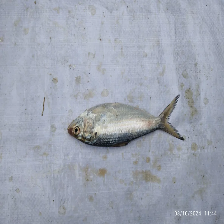

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

#Optuna-Hyper parameter Training

In [ ]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Set Random Seed for Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 📌 Extract the ZIP File
zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
extract_folder = "butterfly_dataset"

if not os.path.exists(extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

# 📌 Generate Labels from Filenames
image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# Get all image filenames
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# Load images and preprocess them for feature extraction
img_size = (224, 224)
images = []
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)  # Convert image to array
    img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
    images.append(img_array)

# Convert list of images into a numpy array
images = np.array(images)

# Ensure the shape is correct (num_images, height, width, channels)
print(f"Image shape: {images.shape}")

# 📌 Use Pre-trained ResNet50 for Feature Extraction
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False  # Freeze the layers

# Extract features from the images
features = resnet_model.predict(np.array(images), batch_size=32)

# Flatten the features for clustering
features_flat = features.reshape(features.shape[0], -1)



# 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
num_clusters = 4  # Set the number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(features_flat)

# 📌 Create a DataFrame with the pseudo-labels
df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# Split into train and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 📌 Image Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 📌 Load Data from DataFrame (Single Folder)
batch_size = 32

train_df["label"] = train_df["label"].astype(str)
val_df["label"] = val_df["label"].astype(str)

train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=image_folder,
    x_col="filename",
    y_col="label",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    directory=image_folder,
    x_col="filename",
    y_col="label",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# 📌 CNN Model Definition
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
])

# 📌 Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Train the Model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100, batch_size=batch_size, verbose=1)

# 📌 Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# 📌 Plot Training vs Validation Accuracy/Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.show()

# 📌 Generate Predictions for Test Data
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

# 📌 Confusion Matrix & Performance Metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# 📌 Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📌 Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# 📌 Save Model
model.save("butterfly_classifier.h5")


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing import image
from google.colab import files  # Use this for Google Colab

# 📌 Load the trained model
model = tf.keras.models.load_model("butterfly_classifier.h5")

# 📌 Define class names (must match the folder names used during training)
class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# 📌 Function to Upload & Predict
def upload_and_predict():
    uploaded = files.upload()  # Opens a file uploader dialog

    for filename in uploaded.keys():
        # Load and preprocess the image
        img_path = filename
        img = image.load_img(img_path, target_size=(224, 224))  # Resize image
        img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

        # 📌 Make Prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)  # Get the class index
        class_label = class_names[predicted_class]

        # 📌 Display Image with Prediction
        plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
        plt.title(f"Predicted: {class_label}")
        plt.axis("off")
        plt.show()

        print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# 📌 Run the function
upload_and_predict()

#Ensamble Training

##1.[Resnet50+Inception+EfficientNet]

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# Define a function to create a model
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(5, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models
resnet_model = create_model(ResNet50)
inception_model = create_model(InceptionV3)
efficientnet_model = create_model(EfficientNetB0)

# Train the models
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Get predictions from all models
resnet_preds_prob = resnet_model.predict(X_test_scaled)
inception_preds_prob = inception_model.predict(X_test_scaled)
efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

resnet_preds = np.argmax(resnet_preds_prob, axis=1)
inception_preds = np.argmax(inception_preds_prob, axis=1)
efficientnet_preds = np.argmax(efficientnet_preds_prob, axis=1)

# Majority voting
final_preds = np.array([np.bincount([r, i, e]).argmax() for r, i, e in zip(resnet_preds, inception_preds, efficientnet_preds)])

# Retrain ResNet50 with new labels
resnet_model_final = create_model(ResNet50)
history_final = resnet_model_final.fit(X_test_scaled, final_preds, epochs=50, batch_size=32, verbose=1, validation_split=0.2)


# Generate predictions for visualization
Y_test_pred_prob = resnet_model_final.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)
Y_test_one_hot = tf.keras.utils.to_categorical(final_preds, num_classes=5)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history_final)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")





# Save the final model
resnet_model_final.save('final_resnet50_model.h5')
print("Final ResNet50 model saved.")

Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.3530 - loss: 1.3507 - val_accuracy: 0.4266 - val_loss: 1.2412
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.4546 - loss: 1.2122 - val_accuracy: 0.5135 - val_loss: 1.0940
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.5243 - loss: 1.1205 - val_accuracy: 0.6302 - val_loss: 1.0128
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5553 - loss: 1.0586 - val_accuracy: 0.6385 - val_loss: 0.9458
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.5949 - loss: 0.9998 - val_accuracy: 0.5646 - val_loss: 1.0167
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6264 - loss: 0.9350 - val_accuracy: 0.5995 - val_loss: 0.9291
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6400 - loss: 0.9004 - val_accuracy: 0.7109 - val_loss: 0.7946
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.6685 - loss: 0.8550 - 

KeyboardInterrupt: 

##2.[Resnet+DenseNet+MobileNet-->Resnet]

Training ResNet50 model...
Epoch 1/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2990 - loss: 1.5766

240/240 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.2993 - loss: 1.5763 - val_accuracy: 0.3688 - val_loss: 1.4585 - learning_rate: 1.0000e-04
Epoch 2/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4076 - loss: 1.4341

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.4077 - loss: 1.4338 - val_accuracy: 0.5026 - val_loss: 1.3692 - learning_rate: 1.0000e-04
Epoch 3/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4811 - loss: 1.3250

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.4811 - loss: 1.3248 - val_accuracy: 0.4563 - val_loss: 1.2870 - learning_rate: 1.0000e-04
Epoch 4/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5223 - loss: 1.2367

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.5225 - loss: 1.2365 - val_accuracy: 0.5828 - val_loss: 1.1329 - learning_rate: 1.0000e-04
Epoch 5/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5682 - loss: 1.1457

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.5683 - loss: 1.1455 - val_accuracy: 0.5896 - val_loss: 1.1048 - learning_rate: 1.0000e-04
Epoch 6/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6004 - loss: 1.0706

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.6004 - loss: 1.0705 - val_accuracy: 0.6219 - val_loss: 1.0198 - learning_rate: 1.0000e-04
Epoch 7/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6187 - loss: 1.0292

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.6187 - loss: 1.0290 - val_accuracy: 0.6479 - val_loss: 0.9643 - learning_rate: 1.0000e-04
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6344 - loss: 0.9693 - val_accuracy: 0.6333 - val_loss: 0.9793 - learning_rate: 1.0000e-04
Epoch 9/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6446 - loss: 0.9317 - val_accuracy: 0.6323 - val_loss: 0.9917 - learning_rate: 1.0000e-04
Epoch 10/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6586 - loss: 0.9062

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.6586 - loss: 0.9061 - val_accuracy: 0.6307 - val_loss: 0.9633 - learning_rate: 1.0000e-04
Epoch 11/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6670 - loss: 0.8745

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.6671 - loss: 0.8744 - val_accuracy: 0.6682 - val_loss: 0.9009 - learning_rate: 1.0000e-04
Epoch 12/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6871 - loss: 0.8339

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.6871 - loss: 0.8340 - val_accuracy: 0.6755 - val_loss: 0.8501 - learning_rate: 1.0000e-04
Epoch 13/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6979 - loss: 0.8067 - val_accuracy: 0.6635 - val_loss: 0.8756 - learning_rate: 1.0000e-04
Epoch 14/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6926 - loss: 0.7980 - val_accuracy: 0.6714 - val_loss: 0.8537 - learning_rate: 1.0000e-04
Epoch 15/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7056 - loss: 0.7680

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7056 - loss: 0.7680 - val_accuracy: 0.6927 - val_loss: 0.8150 - learning_rate: 1.0000e-04
Epoch 16/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.7239 - loss: 0.7314 - val_accuracy: 0.6724 - val_loss: 0.8340 - learning_rate: 1.0000e-04
Epoch 17/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7392 - loss: 0.7062

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7391 - loss: 0.7063 - val_accuracy: 0.7526 - val_loss: 0.6822 - learning_rate: 1.0000e-04
Epoch 18/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.7403 - loss: 0.6927 - val_accuracy: 0.6990 - val_loss: 0.8058 - learning_rate: 1.0000e-04
Epoch 19/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.7409 - loss: 0.6884 - val_accuracy: 0.6792 - val_loss: 0.8131 - learning_rate: 1.0000e-04
Epoch 20/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.7505 - loss: 0.6736 - val_accuracy: 0.7255 - val_loss: 0.7309 - learning_rate: 1.0000e-04
Training DenseNet121 model...
Epoch 1/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6725 - loss: 0.8948

240/240 ━━━━━━━━━━━━━━━━━━━━ 51s 103ms/step - accuracy: 0.6737 - loss: 0.8920 - val_accuracy: 0.9187 - val_loss: 0.2521 - learning_rate: 1.0000e-04
Epoch 2/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9413 - loss: 0.1917

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9413 - loss: 0.1916 - val_accuracy: 0.9526 - val_loss: 0.1475 - learning_rate: 1.0000e-04
Epoch 3/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9670 - loss: 0.1109

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9670 - loss: 0.1109 - val_accuracy: 0.9578 - val_loss: 0.1259 - learning_rate: 1.0000e-04
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9810 - loss: 0.0663 - val_accuracy: 0.9568 - val_loss: 0.1280 - learning_rate: 1.0000e-04
Epoch 5/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9824 - loss: 0.0538

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9824 - loss: 0.0538 - val_accuracy: 0.9615 - val_loss: 0.1050 - learning_rate: 1.0000e-04
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9907 - loss: 0.0385 - val_accuracy: 0.9448 - val_loss: 0.1620 - learning_rate: 1.0000e-04
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9910 - loss: 0.0294 - val_accuracy: 0.9521 - val_loss: 0.1477 - learning_rate: 1.0000e-04
Epoch 8/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9964 - loss: 0.0164

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9964 - loss: 0.0164 - val_accuracy: 0.9635 - val_loss: 0.1012 - learning_rate: 1.0000e-04
Epoch 9/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9977 - loss: 0.0121

240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9976 - loss: 0.0121 - val_accuracy: 0.9646 - val_loss: 0.0967 - learning_rate: 1.0000e-04
Epoch 10/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9972 - loss: 0.0105 - val_accuracy: 0.9589 - val_loss: 0.1366 - learning_rate: 1.0000e-04
Epoch 11/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9984 - loss: 0.0069 - val_accuracy: 0.9688 - val_loss: 0.0984 - learning_rate: 1.0000e-04
Epoch 12/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9172 - val_loss: 0.3493 - learning_rate: 1.0000e-04
Epoch 13/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9979 - loss: 0.0044 - val_accuracy: 0.9641 - val_loss: 0.1116 - learning_rate: 1.0000e-04
Epoch 14/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9682 - val_loss: 0.1089 - learning_rate: 1.0000e-04
Epoch 15/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - a

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step


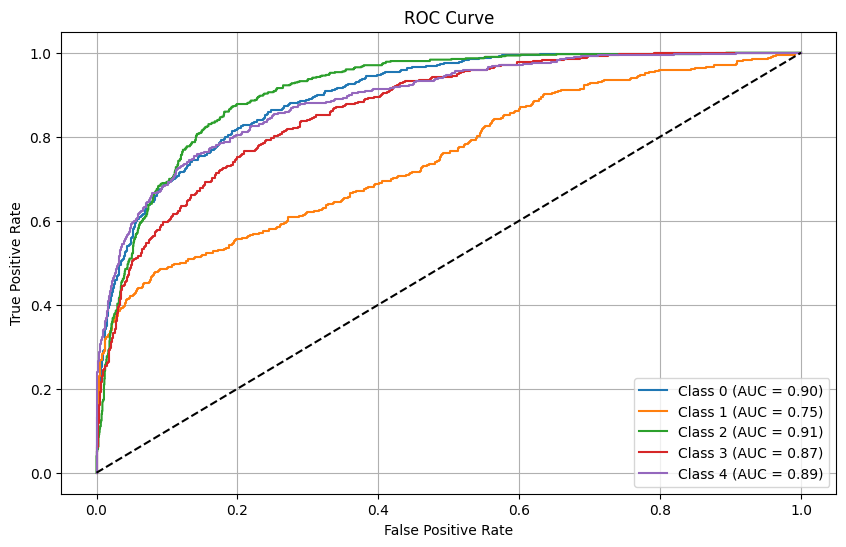

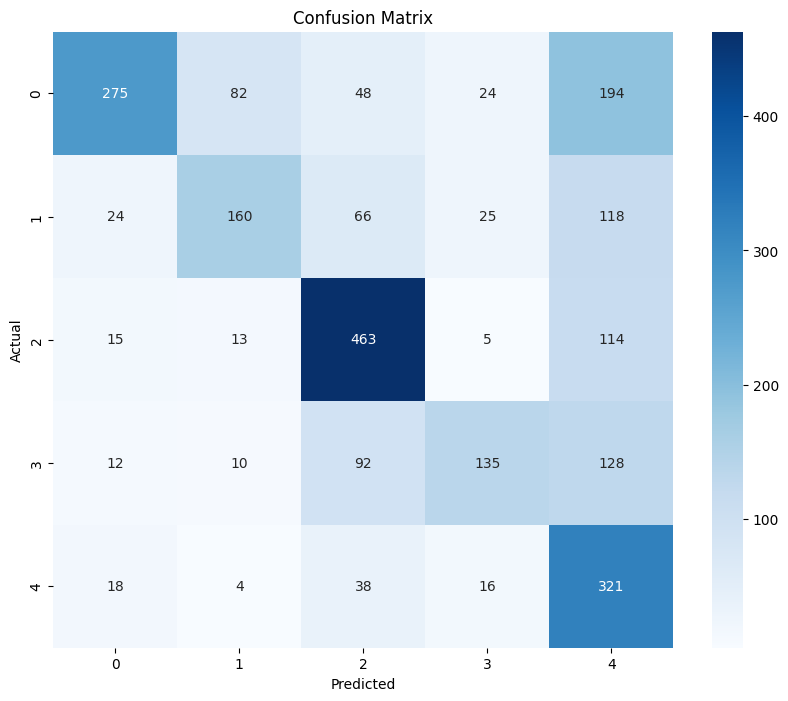

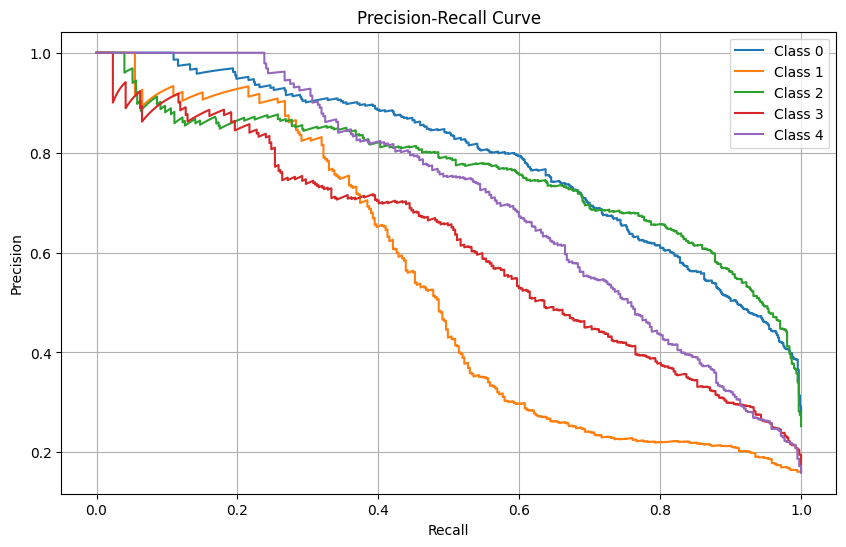

R2 Score: -0.3113


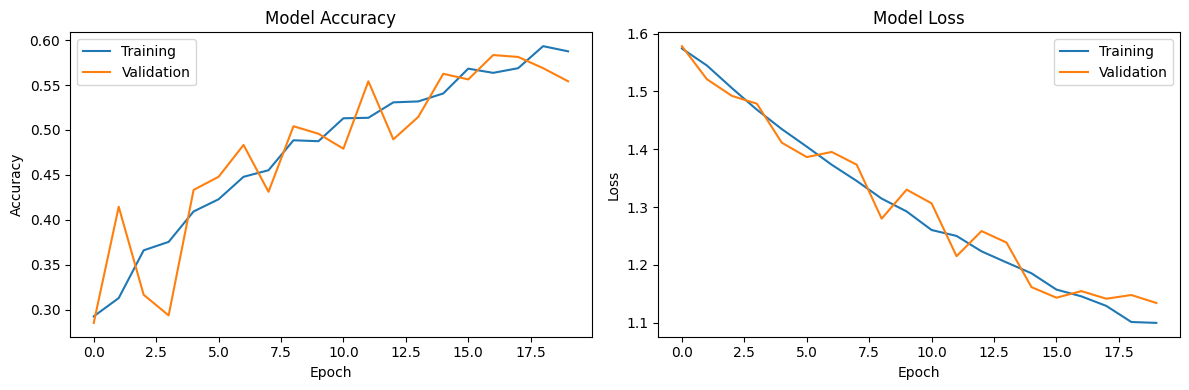


Final Model Performance:
Test Accuracy: 0.5642
F1 Score: 0.5619
Final ResNet50 model saved.


In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, VGG19, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, r2_score

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
csv_logger = CSVLogger('training_log.csv')
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]

# Define a function to create a model
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    output = Dense(5, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=RMSprop(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models
resnet_model = create_model(ResNet50)
densenet_model = create_model(DenseNet121)
vgg19_model = create_model(VGG19)

# Train the models
print("Training ResNet50...")
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
print("Training DenseNet121...")
history_densenet = densenet_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)
print("Training VGG19...")
history_vgg19 = vgg19_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models
resnet_preds_prob = resnet_model.predict(X_test_scaled)
densenet_preds_prob = densenet_model.predict(X_test_scaled)
vgg19_preds_prob = vgg19_model.predict(X_test_scaled)

resnet_preds = np.argmax(resnet_preds_prob, axis=1)
densenet_preds = np.argmax(densenet_preds_prob, axis=1)
vgg19_preds = np.argmax(vgg19_preds_prob, axis=1)

# Majority voting
final_preds = np.array([np.bincount([r, d, v]).argmax() for r, d, v in zip(resnet_preds, densenet_preds, vgg19_preds)])

# Retrain ResNet50 with new labels
print("Retraining ResNet50 with updated labels...")
resnet_model_final = create_model(ResNet50)
history_final = resnet_model_final.fit(X_test_scaled, final_preds, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Save the final model
resnet_model_final.save('final_resnet50_model.h5')

# Generate predictions for visualization
Y_test_pred_prob = resnet_model_final.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)
Y_test_one_hot = tf.keras.utils.to_categorical(final_preds, num_classes=5)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # R2 Score
    print(f"R2 Score: {r2_score(Y_test, Y_test_pred):.4f}")

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history_final)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final ResNet50 model saved.")


#Single Transfer Model Trianing

#ResNet50

Epoch 1/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2787 - loss: 1.5842
Epoch 1: val_loss improved from inf to 1.45354, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 28s 77ms/step - accuracy: 0.2790 - loss: 1.5839 - val_accuracy: 0.4469 - val_loss: 1.4535
Epoch 2/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3856 - loss: 1.4559
Epoch 2: val_loss improved from 1.45354 to 1.32181, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.3857 - loss: 1.4556 - val_accuracy: 0.4901 - val_loss: 1.3218
Epoch 3/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4575 - loss: 1.3447
Epoch 3: val_loss improved from 1.32181 to 1.26536, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.4577 - loss: 1.3445 - val_accuracy: 0.4719 - val_loss: 1.2654
Epoch 4/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5092 - loss: 1.2596
Epoch 4: val_loss improved from 1.26536 to 1.14089, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.5093 - loss: 1.2594 - val_accuracy: 0.5734 - val_loss: 1.1409
Epoch 5/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5625 - loss: 1.1680
Epoch 5: val_loss improved from 1.14089 to 1.10141, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.5625 - loss: 1.1679 - val_accuracy: 0.5755 - val_loss: 1.1014
Epoch 6/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5845 - loss: 1.1030
Epoch 6: val_loss improved from 1.10141 to 1.09765, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.5846 - loss: 1.1029 - val_accuracy: 0.5656 - val_loss: 1.0977
Epoch 7/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6010 - loss: 1.0579
Epoch 7: val_loss improved from 1.09765 to 1.04066, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6010 - loss: 1.0577 - val_accuracy: 0.5875 - val_loss: 1.0407
Epoch 8/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6136 - loss: 1.0124
Epoch 8: val_loss improved from 1.04066 to 1.01391, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6136 - loss: 1.0123 - val_accuracy: 0.6323 - val_loss: 1.0139
Epoch 9/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6456 - loss: 0.9509
Epoch 9: val_loss improved from 1.01391 to 0.94289, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6456 - loss: 0.9509 - val_accuracy: 0.6521 - val_loss: 0.9429
Epoch 10/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6526 - loss: 0.9264
Epoch 10: val_loss improved from 0.94289 to 0.84914, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6526 - loss: 0.9263 - val_accuracy: 0.6896 - val_loss: 0.8491
Epoch 11/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6580 - loss: 0.9018
Epoch 11: val_loss improved from 0.84914 to 0.84011, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.6580 - loss: 0.9017 - val_accuracy: 0.6880 - val_loss: 0.8401
Epoch 12/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6807 - loss: 0.8533
Epoch 12: val_loss improved from 0.84011 to 0.80817, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.6807 - loss: 0.8533 - val_accuracy: 0.7016 - val_loss: 0.8082
Epoch 13/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6873 - loss: 0.8242
Epoch 13: val_loss did not improve from 0.80817
240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.6873 - loss: 0.8242 - val_accuracy: 0.6917 - val_loss: 0.8169
Epoch 14/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7039 - loss: 0.8088
Epoch 14: val_loss improved from 0.80817 to 0.75888, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7039 - loss: 0.8087 - val_accuracy: 0.7281 - val_loss: 0.7589
Epoch 15/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6999 - loss: 0.7896
Epoch 15: val_loss did not improve from 0.75888
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.7000 - loss: 0.7895 - val_accuracy: 0.6708 - val_loss: 0.9034
Epoch 16/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7078 - loss: 0.7733
Epoch 16: val_loss improved from 0.75888 to 0.73052, saving model to best_model.h5


240/240 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - accuracy: 0.7078 - loss: 0.7732 - val_accuracy: 0.7339 - val_loss: 0.7305
Epoch 17/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7169 - loss: 0.7391
Epoch 17: val_loss did not improve from 0.73052
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.7169 - loss: 0.7391 - val_accuracy: 0.6854 - val_loss: 0.8135
Epoch 18/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7302 - loss: 0.7305
Epoch 18: val_loss did not improve from 0.73052
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.7302 - loss: 0.7304 - val_accuracy: 0.7198 - val_loss: 0.7879
Epoch 19/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7354 - loss: 0.6981
Epoch 19: val_loss did not improve from 0.73052
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.7354 - loss: 0.6981 - val_accuracy: 0.6781 - val_loss: 0.8066
Epoch 20/20
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7371 - loss: 0.6905
Epoch 20: val_loss did not i

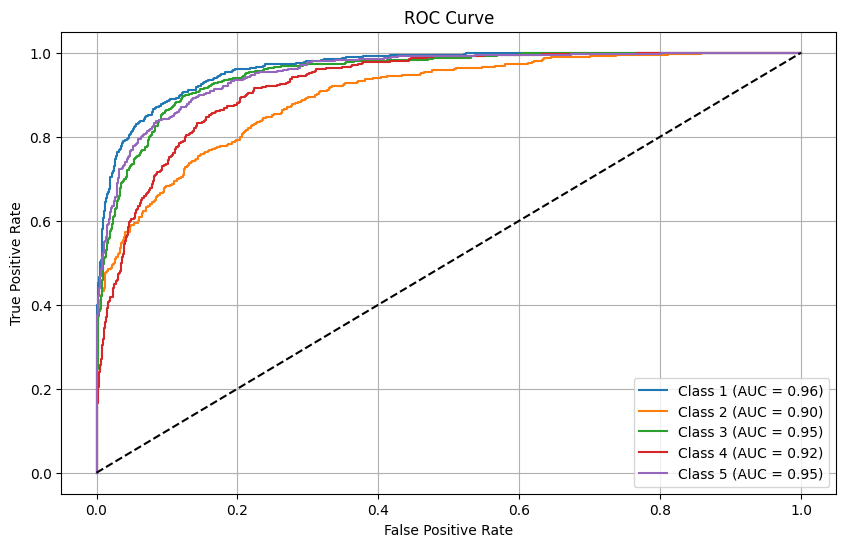

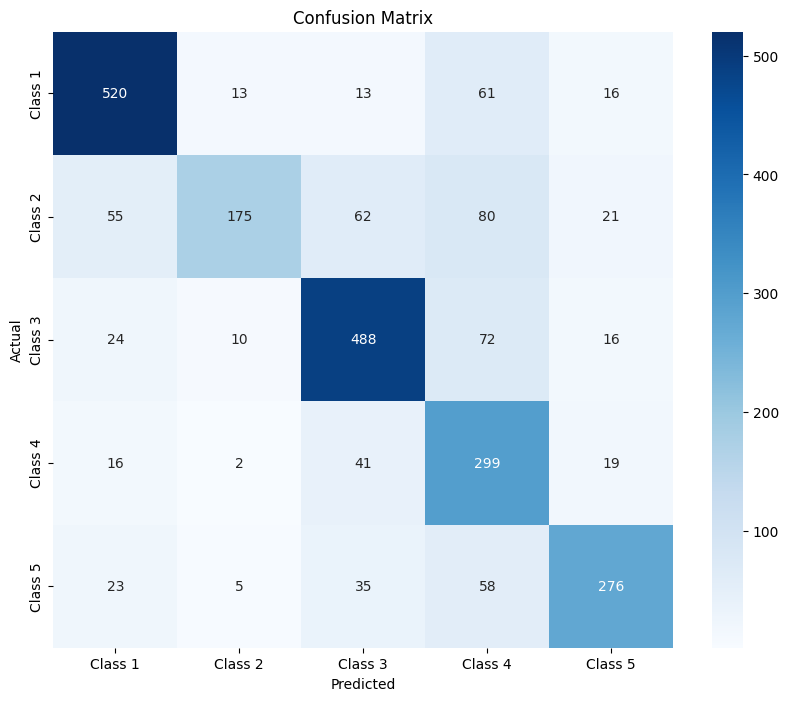


Final Model Performance:
Test Accuracy: 0.7325
F1 Score: 0.7303
Final ResNet50 model saved.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Train model with callbacks
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=20, batch_size=32, verbose=1,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# One-hot encode the test labels (if not already done)
Y_test_one_hot = to_categorical(Y_test, num_classes=5)

# Generate predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Define class labels (adjust as per your classes)
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels):
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Final metrics
    print("\nFinal Model Performance:")
    print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
    print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels)

# Save the model after training (if not already saved by checkpoint)
model.save('final_resnet_model.h5')
print("Final ResNet50 model saved.")


In [ ]:
model.save('resnet.keras')

#EfficientNetB0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the EfficientNetB0 model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=20, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/20
206/240 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1706 - loss: nan

In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#InceptionV3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the InceptionV3 model with transfer learning
input_shape = (224, 224, 3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=20, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#MobileNetV2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the MobileNetV2 model with transfer learning
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=20, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#VGG-19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the VGG16 model with transfer learning
input_shape = (224, 224, 3)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=20, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


In [ ]:
# model.save('efficientnetb0.h5')

#End